# Naïve Bayes Classification on Advertising Dataset

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/advertising_ef.csv')
df.head()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [2]:
df_cleaned = df.dropna()


In [3]:
# Encode categorical variables: Gender (Male=1, Female=0)
df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 1, "Female": 0})



<ipython-input-3-fd3e4b94d6f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 1, "Female": 0})


In [4]:
features = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Gender"]
target = "Clicked on Ad"


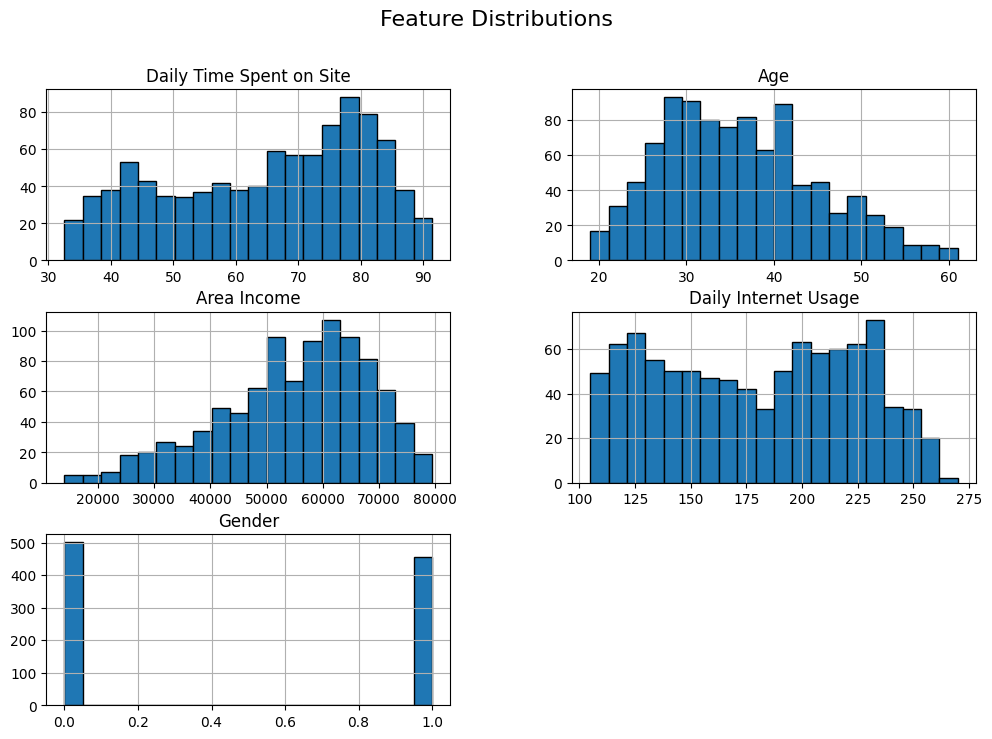

In [5]:
df_cleaned[features].hist(figsize=(12, 8), bins=20, edgecolor='black') #histograms for numerical features
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


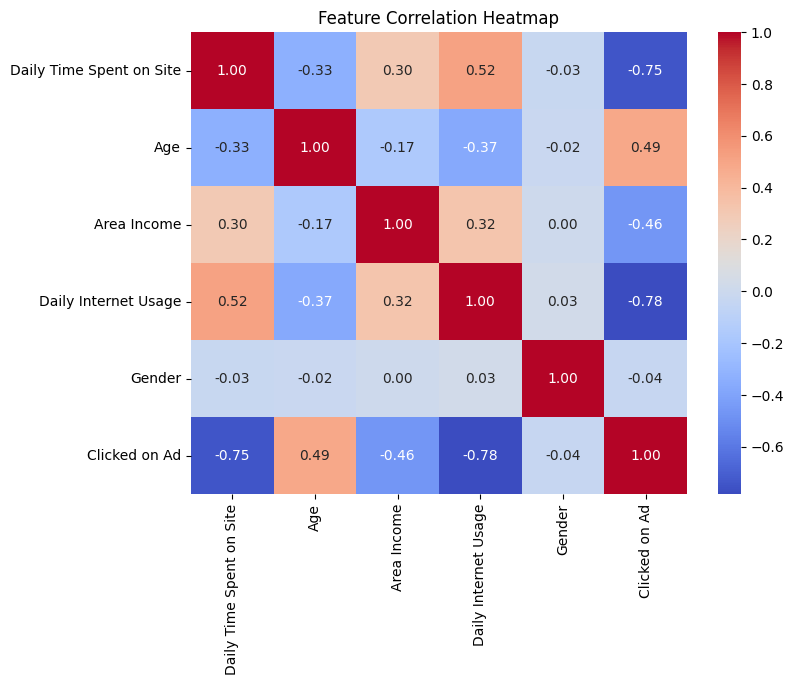

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


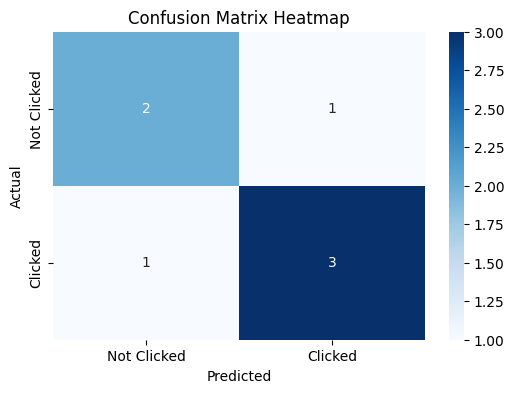

In [7]:
# Sample data
y_true = [0, 1, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1]

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Clicked", "Clicked"],
            yticklabels=["Not Clicked", "Clicked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


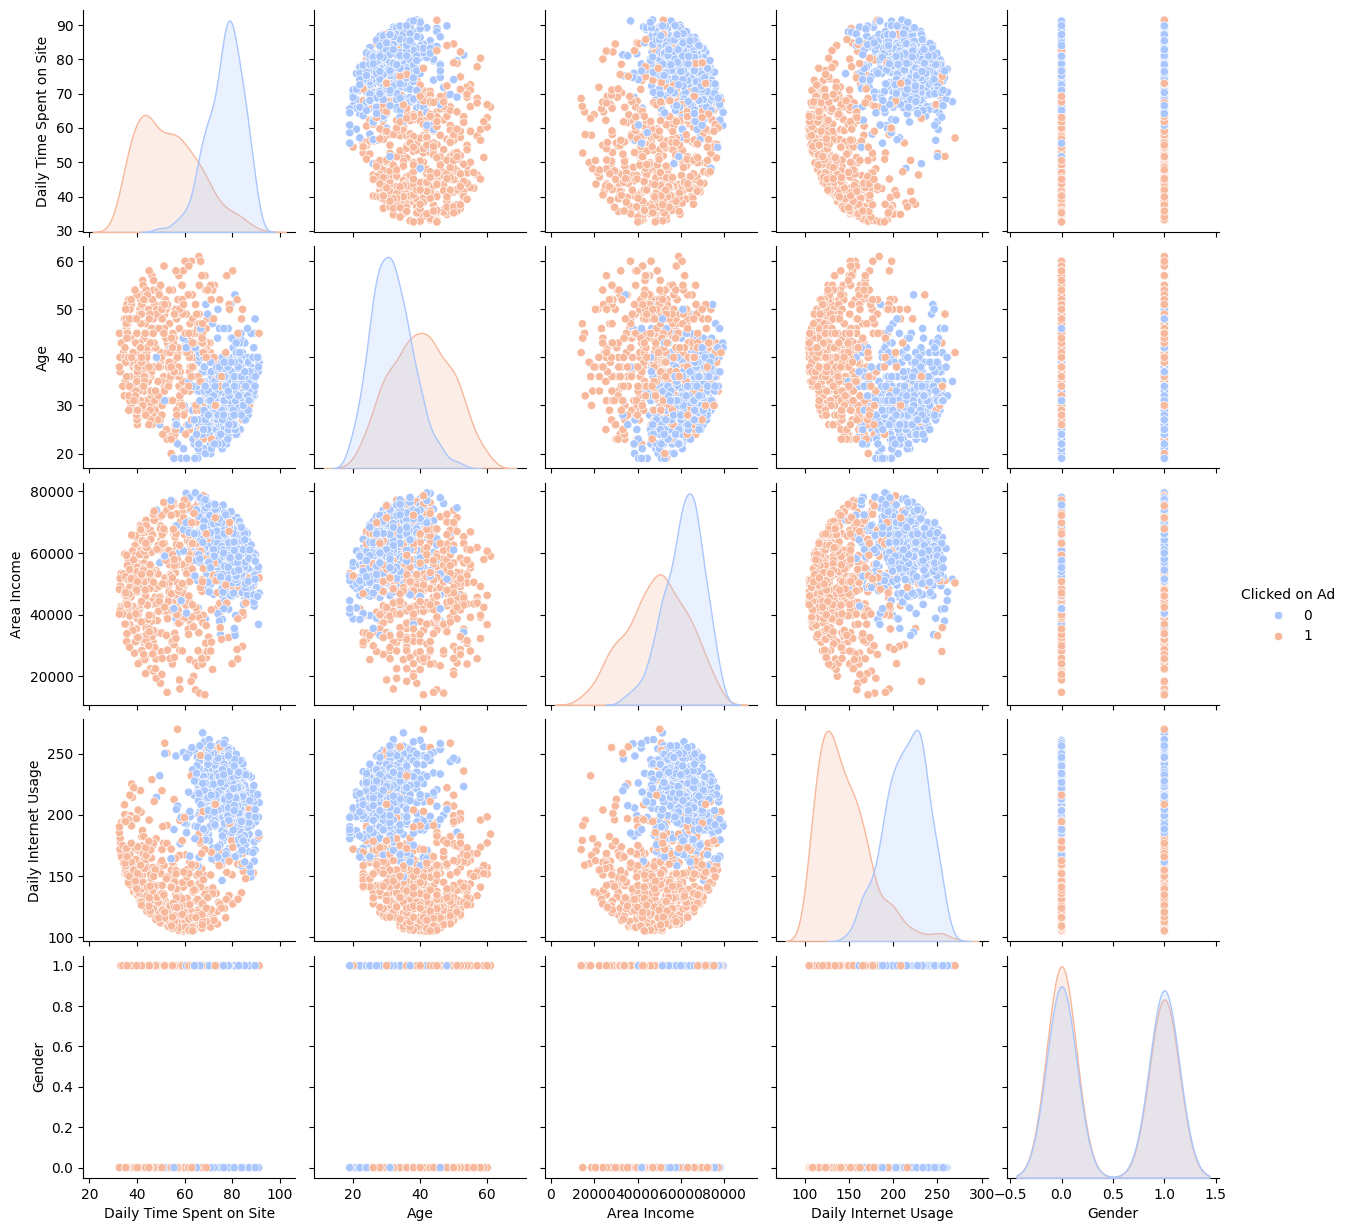

In [8]:
sns.pairplot(df_cleaned, hue="Clicked on Ad", vars=features, palette="coolwarm")
plt.show()# Pairplot to visualize relationships

In [9]:
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)



In [11]:

y_pred = nb_classifier.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9477351916376306
Confusion Matrix:
 [[138   5]
 [ 10 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.96      0.93      0.95       144

    accuracy                           0.95       287
   macro avg       0.95      0.95      0.95       287
weighted avg       0.95      0.95      0.95       287

